# Neural Network with No Libraries Just Straight up Calculus and Numpy 

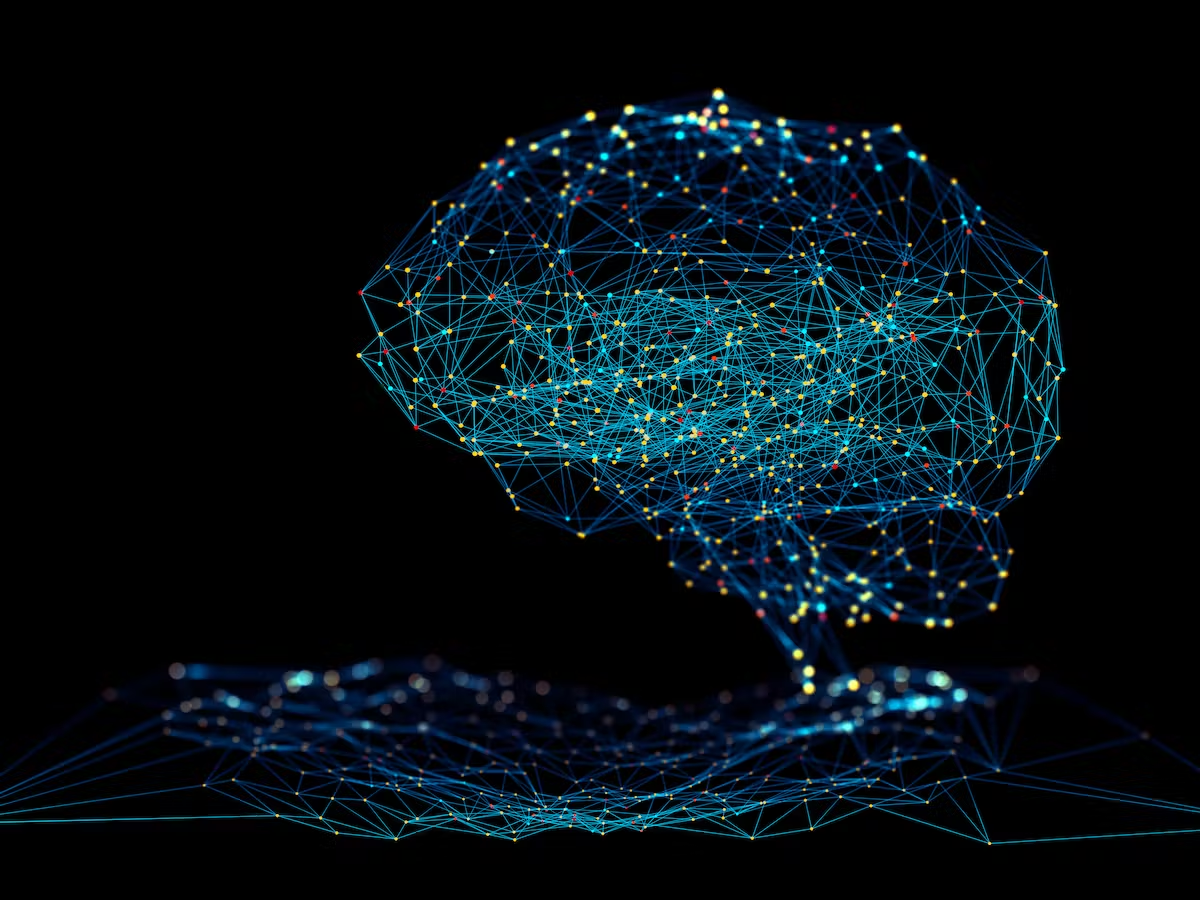

I wanted to challange myself and create a NN with no libraries, (pyTorch/TensorFlow) as I think that It will be a fun challange. I would like to start by using a less commonly known dataset. I will explain all of the steps as I go, so you could possibly apply some of the concepts that I am applying and maybe apply them yourself. 

### Using Kaggle For the Data Set

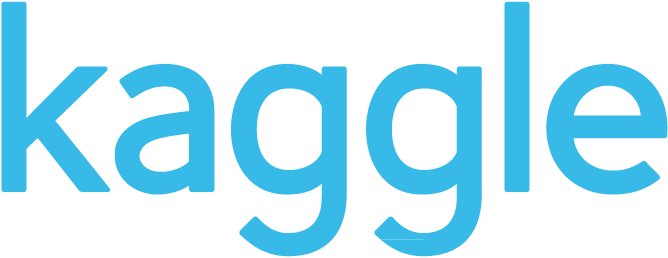

I wanted to find a data set that had very little docs on, and I wanted to be able to make predictions with the NN. I Wanted to keep this data set very small as the GPU is not the greatest. I think that the only limitation in this project is going to be my GPU. I have a 2090 GPU in my computer, and It has been shown that the GPU does help with the processing power behind the Neural Network. 


### What is the Data set? 
I have decided to work on a computer vision project, not normally my forte, but something I am willing to try as I am all for trying stuff that I may or may not be good at. I am dowloading the data set from kaggle.com, the data set is pictures of various people working out, and the objective will be to id the type of lift/workout they are doing.


### THIS DATA SET IS 2 MONTHS OLD AS OF 05/12/2023

#### Quick Description of the data set
The data set is already pre classified, the folder names are the kind of lifts the individual is doing. 

There are 22 kinds of lifts/ workouts in the data set and they are... 

- Bicep Curl 
- Bench Press
- Chest Fly
- Deadlift 
- Decline Benchpress
- hammer Curl
- hip thrust 
- incline bench press
- lat pulldown 
- lat raises 
- leg extension
- leg raises 
- planks 
- pull up 
- push up 
- romaninan deadlift 
- russian twist 
- shoulder press
- squat
- t bar rows 
- tricep dips 
- tricep push downs 

Here is the link to the data set if you would like to play with the data set yourself. https://www.kaggle.com/datasets/hasyimabdillah/workoutexercises-images?resource=download

In [16]:
# Import required libraries
import zipfile 
import csv
import os 
from PIL import Image
import matplotlib.pyplot as plt 
import numpy as np 
import random

## Step 1: Loading all of the Data into the Notebook

### What This step is doing...

- loading all of the pictures into the code, I have these locally saved on my hard drive 
- We ate setting the size of the images, the size of the images matter, for the input numbers, they are the multiples of the amount of the pixles in the image, so an 8x8 would be 64 input layers, 16x16 would be 256 input layers so on and so on. 
- Putting all of the files into a list, and storing them with the properly saved wourkout
- we are then making all of the images into a numpy array 
- we are then saving all of the workout types, so the nn knows what it is being trained on. 
- we then shuffle the images, and split them between the training set, and the testing set. This step might have be done multiple times to get the best outcome. 

In [18]:
# Define the directory containing all the images
directory = r"F:\Workout pics_non_zip"

# Define the target size for the images
target_size = (64, 64)  # Set the desired size (e.g., 64x64)

subdirectories = [f.name for f in os.scandir(directory) if f.is_dir()]
image_files = []

for subdirectory in subdirectories:
    subdirectory_path = os.path.join(directory, subdirectory)
    subdirectory_image_files = [f.name for f in os.scandir(subdirectory_path) if f.is_file() and f.name.endswith(('.jpg', '.png', '.jpeg'))]
    for file in subdirectory_image_files:
        image_files.append(os.path.join(subdirectory, file))

workout_types = []

for file in image_files:
    workout_type = os.path.dirname(file)
    
    if workout_type not in workout_types:
        workout_types.append(workout_type)

workout_dict = {workout_type: i for i, workout_type in enumerate(workout_types)}

def convert_images_to_arrays(file_list, directory):
    image_array_list = []
    target_output_list = []
    for file in file_list:

        workout_type = os.path.dirname(file)
        
        target_output = np.zeros(len(workout_types))
        target_output[workout_dict[workout_type]] = 1
        target_output_list.append(target_output)

        image_path = os.path.join(directory, file)
        image = Image.open(image_path)

        image = image.convert("L")

        image = image.resize((64, 64))  
        image_array_list.append(np.array(image))
    return image_array_list, target_output_list


random.shuffle(image_files)

train_files = image_files[:int(len(image_files) * 0.85)]
test_files = image_files[int(len(image_files) * 0.85):]

train_images, train_outputs = convert_images_to_arrays(train_files, directory)
test_images, test_outputs = convert_images_to_arrays(test_files, directory)

## Step 2: Setting up the Actual Neural Network

Layers, inputs, outputs weights and biases

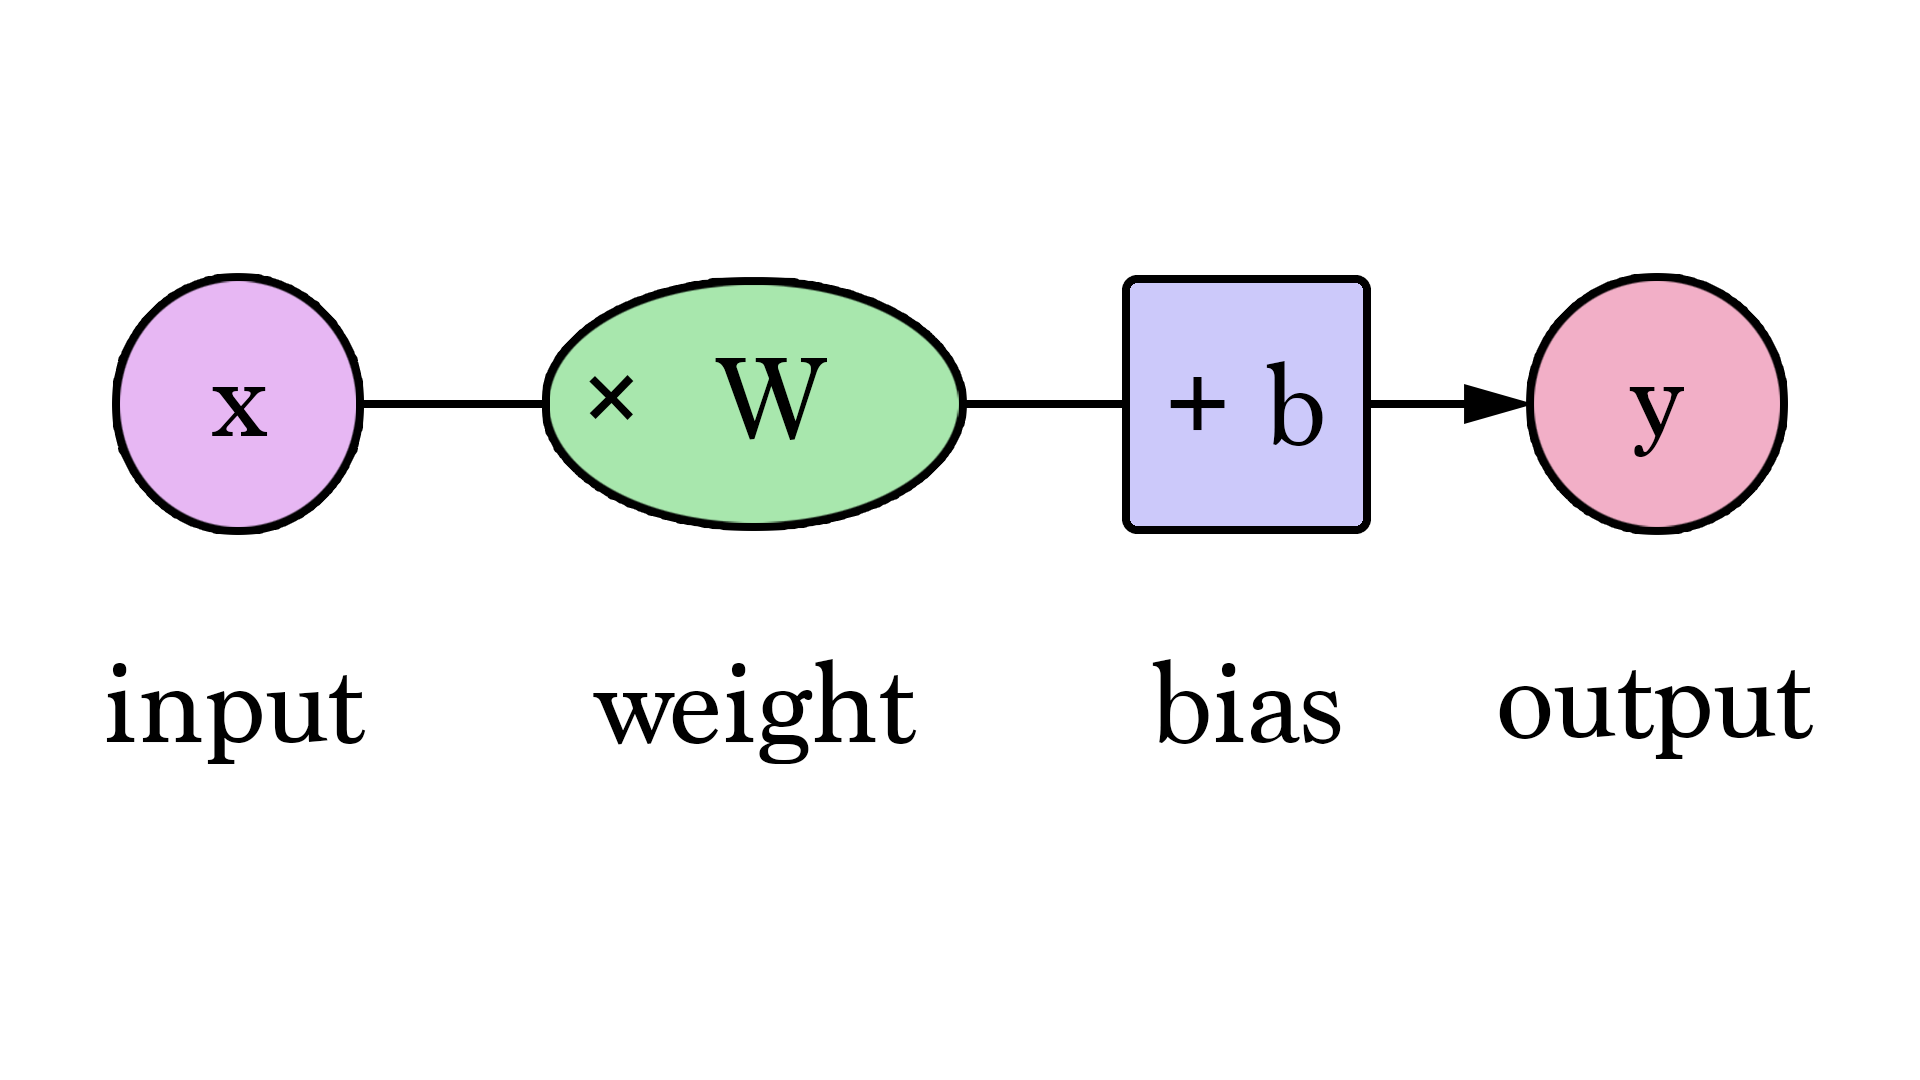


In [19]:
# input units and output units
input_units = 64 * 64  # Updated for 64x64 grayscale images.
output_units = 22  # Number of possible outcomes in your dataset

# hidden layer
hidden_units = 128

# weights and biases
weights_1 = np.random.randn(hidden_units, input_units)
biases_1 = np.zeros((hidden_units, 1))
weights_2 = np.random.randn(output_units, hidden_units)
biases_2 = np.zeros((output_units, 1))

# ReLU function
def relu(x):
    return np.maximum(0, x)

# ReLU derivative function
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# forward propagation function
def forward_propagation(image, weights_1, biases_1, weights_2, biases_2):
    image_flattened = image.reshape((-1, 1))
    
    # Calculate the activations of the hidden layer
    hidden_activations = relu(np.dot(weights_1, image_flattened) + biases_1)
    
    # Calculate the activations of the output layer
    output_activations = relu(np.dot(weights_2, hidden_activations) + biases_2)
    
    return hidden_activations, output_activations

By printing the workout dict, we are able to see all of the kinds of workouts, and in theory, how many of kinds of lifts the NN could define. This is a good strat if you are working with thousands upon thousands of pictures, that are all labled, just by the name of the picture itself.

## Step : Making Sure the data loads

Just a small step, to make sure that the data actually shows up within the JuPyter Notebook. Just a personal precaution I take when ensuring the data has been filtered properly in accordance with the folder of the lift. 

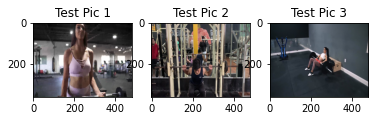

In [21]:
# GETTING THE FILE PATHWAY FOR THE PICS, JUST WANT TO CONFIRM THE DATA IS THERE  
pic_1_path = r"F:\Workout pics_non_zip\barbell biceps curl\barbell biceps curl_500051.jpg"
pic_2_path = r"F:\Workout pics_non_zip\squat\squat_100161.jpg"
pic_3_path = r"F:\Workout pics_non_zip\hip thrust\hip thrust_500071.jpg"

# GETTING THE IMAGES FROM THAT FOLDER
pic_1 = plt.imread(pic_1_path)
pic_2 = plt.imread(pic_2_path)
pic_3 = plt.imread(pic_3_path)

plt.subplot(1, 3, 1)
plt.imshow(pic_1)
plt.title("Test Pic 1")

plt.subplot(1, 3, 2)
plt.imshow(pic_2)
plt.title("Test Pic 2")

plt.subplot(1, 3, 3)
plt.imshow(pic_3)
plt.title("Test Pic 3")

plt.show()

In [25]:
def backward_propagation(image, output, target, hidden_activations, weights_2, biases_2):
    image_flattened = image.reshape((-1, 1))
    target = target.reshape((-1, 1))

    # Calculate the output error
    output_error = output - target

    # Calculate the hidden layer error
    hidden_error = np.dot(weights_2.T, output_error)

    # Calculate the weights and biases gradients
    weights_2_gradient = np.dot(output_error, hidden_activations.T)
    biases_2_gradient = output_error
    weights_1_gradient = np.dot(hidden_error, image_flattened.T) * relu_derivative(np.dot(weights_1, image_flattened) + biases_1)
    biases_1_gradient = hidden_error * relu_derivative(np.dot(weights_1, image_flattened) + biases_1)

    return weights_1_gradient, biases_1_gradient, weights_2_gradient, biases_2_gradient


In [ ]:
# Define a learning rate and epochs
learning_rate = 0.001
epochs = 10

print("Training the neural network...")
for epoch in range(epochs):
    for i, image in enumerate(train_images):
        # Forward propagation
        hidden_activations, output = forward_propagation(image, weights_1, biases_1, weights_2, biases_2)

        # Backward propagation
        weights_1_gradient, biases_1_gradient, weights_2_gradient, biases_2_gradient = backward_propagation(
            image, output, train_outputs[i], hidden_activations, weights_2, biases_2)

        # Update weights and biases
        weights_1 -= learning_rate * weights_1_gradient
        biases_1 -= learning_rate * biases_1_gradient
        weights_2 -= learning_rate * weights_2_gradient
        biases_2 -= learning_rate * biases_2_gradient

    print(f'Epoch {epoch+1}/{epochs} completed.')

print("\nTesting the neural network...")
for i, image in enumerate(test_images):
    # Forward propagation
    hidden_activations, output = forward_propagation(image, weights_1, biases_1, weights_2, biases_2)

    print(f"Testing - Epoch {epoch+1}/{epochs}, File: {test_files[i]}, Output: {output}, Target: {test_outputs[i]}")